In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

- Rank: Peringkat penjualan game berdasarkan total penjualan global.
- Name: Nama game.
- Year: Tahun rilis game.
- NA_Sales: Penjualan game di Amerika Utara (dalam jutaan unit).
- EU_Sales: Penjualan game di Eropa (dalam jutaan unit).
- JP_Sales: Penjualan game di Jepang (dalam jutaan unit).
- Other_Sales: Penjualan game di wilayah lain selain Amerika Utara, Eropa, dan Jepang (dalam jutaan unit).
- Global_Sales: Total penjualan global game (dalam jutaan unit).

In [43]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Eksplorasi Data
---

In [44]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Imputasi Mean

In [45]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.head(4))

   Rank               Name Platform    Year     Genre Publisher  NA_Sales   
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     41.49  \
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08   
2     3     Mario Kart Wii      Wii  2008.0    Racing  Nintendo     15.85   
3     4  Wii Sports Resort      Wii  2009.0    Sports  Nintendo     15.75   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  


Beberapa fitur dapat dieksplorasi dengan cara berikut.

In [46]:
cdf = df[['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
cdf.head(10)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37
5,6,1989.0,23.20,2.26,4.22,0.58,30.26
6,7,2006.0,11.38,9.23,6.50,2.90,30.01
7,8,2006.0,14.03,9.20,2.93,2.85,29.02
8,9,2009.0,14.59,7.06,4.70,2.26,28.62
9,10,1984.0,26.93,0.63,0.28,0.47,28.31


Fitur-fitur tersebut dapat diplot sebagai berikut:

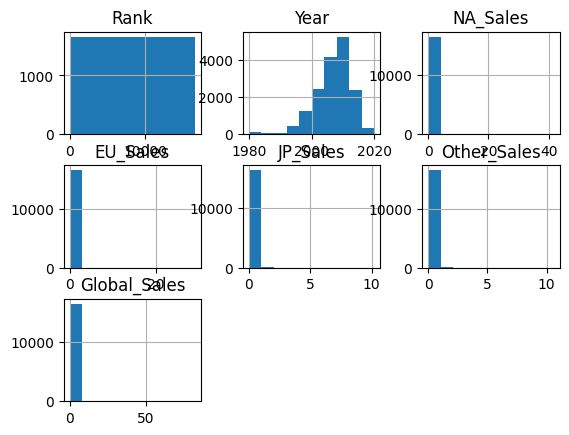

In [47]:
viz = cdf[['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
viz.hist()
plt.show()

Plot fitur-fitur vs Global Sales dapat dibuat dan dapat dilihat linearitas hubungannya.

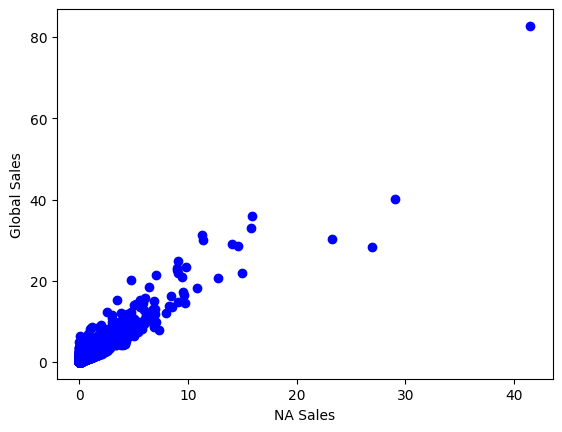

In [48]:
plt.scatter(cdf.NA_Sales, cdf.Global_Sales,  color='blue')
plt.xlabel("NA Sales")
plt.ylabel("Global Sales")
plt.show()

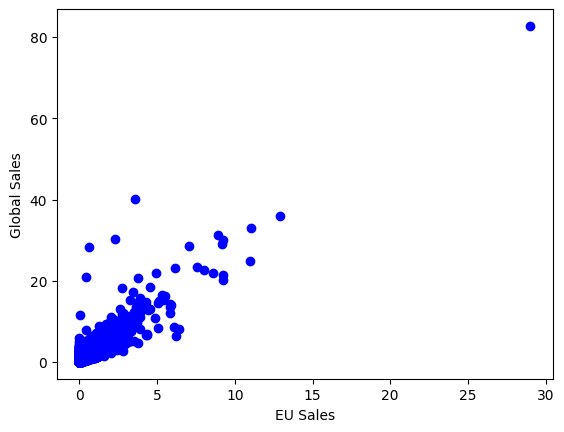

In [80]:
plt.scatter(cdf.EU_Sales, cdf.Global_Sales,  color='blue')
plt.xlabel("EU Sales")
plt.ylabel("Global Sales")
plt.show()

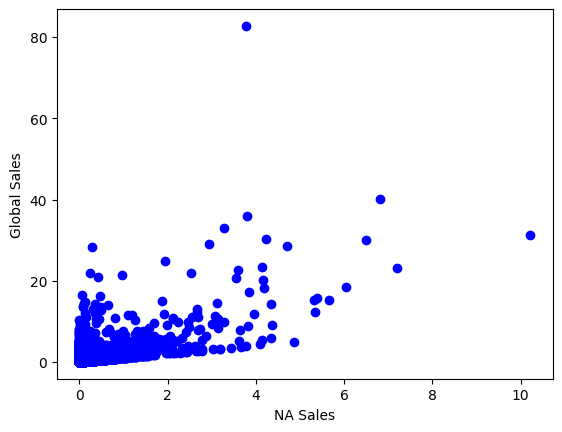

In [50]:
plt.scatter(cdf.JP_Sales, cdf.Global_Sales,  color='blue')
plt.xlabel("JP Sales")
plt.ylabel("Global Sales")
plt.show()

### Pembuatan dataset pelatihan dan pengujian
---
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.

In [56]:
# Mengambil "NA Sales" sebagai variabel independen (regressor)
X = cdf.iloc[:, 2].values
# Mengambil "Global Sales" sebagai variabel dependen
y = cdf.iloc[:, 6].values
# Reshape data karena hanya menggunakan satu fitur "Engine Size"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalisasi atau scaling dataset

In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Pembuatan Model

In [59]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X, y)

C:\Users\alifi\AppData\Local\Temp\ipykernel_3460\1489805368.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


RandomForestRegressor()

Prediksi nilai baru dengan model yang telah dibentuk

In [74]:
# Predicting a new result
new_data = np.array([[17.5]])

# Lakukan transformasi menggunakan sc_X
new_data_scaled = sc_X.transform(new_data)

# Lakukan prediksi menggunakan regressor
y_pred_scaled = regressor.predict(new_data_scaled)

# Lakukan reshape pada y_pred_scaled
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Lakukan inverse transformasi menggunakan sc_y
y_pred = sc_y.inverse_transform(y_pred_scaled)

# Cetak hasil prediksi
print(y_pred)

[[33.9552]]


Visualisasi Hasil dalam nilai yang discaling:

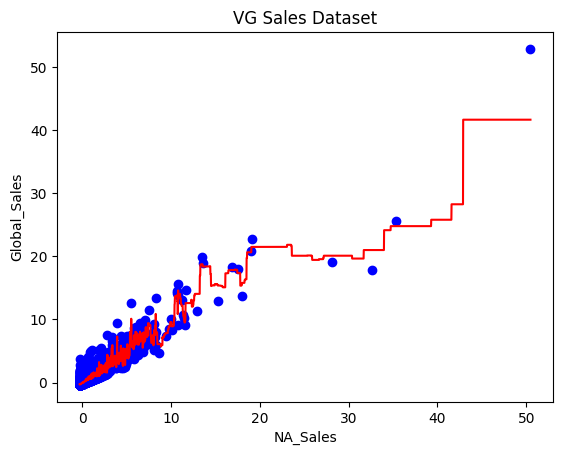

In [75]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('VG Sales Dataset')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.show()

Visualisasi Hasil dalam nilai asalnya:

ValueError: Expected 2D array, got 1D array instead:
array=[-0.25762889 -0.3005921  -0.30163557 ... 41.63591424 41.63591424
 41.63591424].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

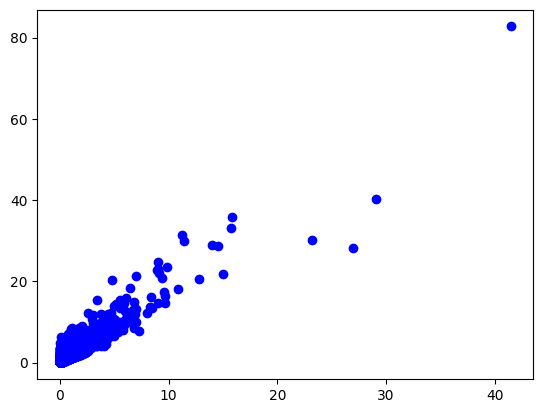

In [78]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'red')
plt.title('VG Sales Dataset')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.show()

Visualisasi Tree (dengan nilai yang discaling):

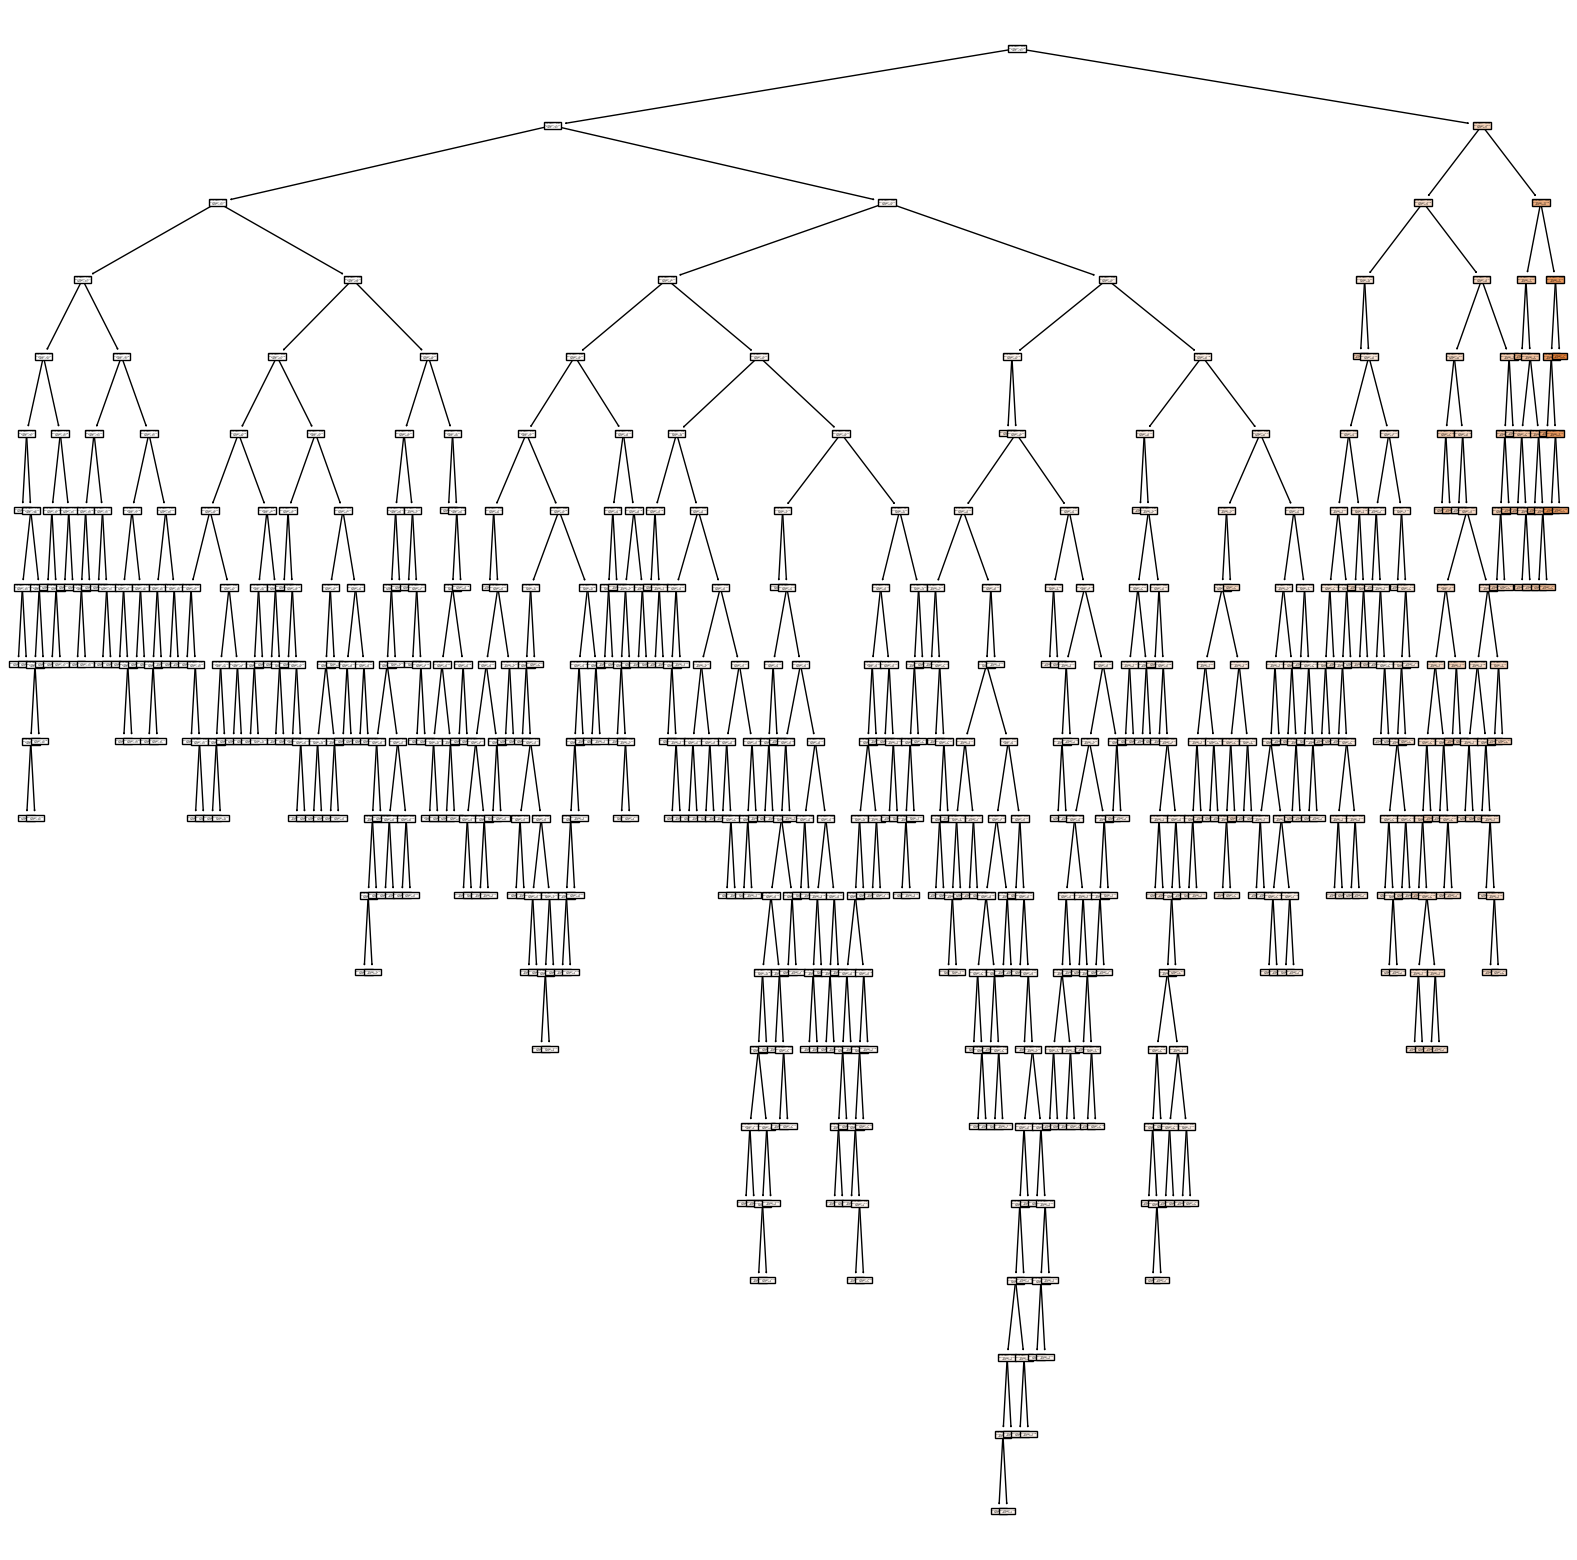

In [67]:
from sklearn import tree
plt.figure(figsize=(20,20))
graph = tree.plot_tree(regressor.estimators_[0], feature_names=['Global Sales'], filled=True)

### Evaluasi
---
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi. Metrik evaluasi sangat penting untuk pengembangan model karena memberikan pengetahuan untuk perbaikan model.

Ada berbagai metrik untuk evaluasi model, misalnya MSE sebagai error untuk mengetahui akurasi dari model yang dibangun yang dihitung dari MSE model terhadap data pengujian: 
- Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
- Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
- Root Mean Squared Error (RMSE).
- R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.

In [79]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(X)  # Mengganti 'cdf[['NA_Sales']]' dengan 'X' jika X sudah berisi data yang sesuai
test_y = np.asanyarray(y)  # Mengganti 'cdf[['Global_Sales']]' dengan 'y' jika y sudah berisi data yang sesuai
test_y_ = regressor.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 0.47
Residual sum of squares (MSE): 1.88
R2-score: 0.93


- MAE sebesar 0.47 menunjukkan bahwa rata-rata selisih absolut antara prediksi dan nilai sebenarnya adalah 0.47.
- MSE sebesar 1.88 menunjukkan jumlah kuadrat selisih antara prediksi dan nilai sebenarnya adalah 1.88.
- R2-score sebesar 0.93 menunjukkan bahwa model regresi berhasil menjelaskan sekitar 93% variabilitas dalam data.


Dalam konteks dataset dan model yang digunakan, MAE dan MSE yang rendah dan R2-score yang tinggi menunjukkan bahwa model regresi memiliki kinerja yang baik dalam memprediksi nilai Global_Sales berdasarkan NA_Sales.